In [17]:
import matplotlib.pyplot as plt
import numpy as np

def carrelage(n, x_def, y_def, x, y, echiquier, L=[1]): 
    
    if n == 2:
        
        for i in range(2):
            for j in range(2):
                if not (x + i == x_def and y + j == y_def):
                    echiquier[x + i][y + j] = L[0]
        L[0] += 1
        return L[0]
    
    
    half_echiquier = n // 2
    x_milieu = x + half_echiquier
    y_milieu = y + half_echiquier
    
    
    defaut = 1 if x_def < x_milieu and y_def < y_milieu else \
             2 if x_def < x_milieu and y_def >= y_milieu else \
             3 if x_def >= x_milieu and y_def < y_milieu else 4
    
   
    if defaut != 1:
        echiquier[x_milieu - 1][y_milieu - 1] = L[0]
    if defaut != 2:
        echiquier[x_milieu - 1][y_milieu] = L[0]
    if defaut != 3:
        echiquier[x_milieu][y_milieu - 1] = L[0]
    if defaut != 4:
        echiquier[x_milieu][y_milieu] = L[0]
    L[0] += 1

    
    carrelage(half_echiquier, 
              x_def if defaut == 1 else x_milieu - 1, 
              y_def if defaut == 1 else y_milieu - 1,
              x, y, echiquier, L)
    
    carrelage(half_echiquier, 
              x_def if defaut == 2 else x_milieu - 1, 
              y_def if defaut == 2 else y_milieu,
              x, y + half_echiquier, echiquier, L)
    
    carrelage(half_echiquier, 
              x_def if defaut == 3 else x_milieu, 
              y_def if defaut == 3 else y_milieu - 1,
              x + half_echiquier, y, echiquier, L)
    
    carrelage(half_echiquier, 
              x_def if defaut == 4 else x_milieu, 
              y_def if defaut == 4 else y_milieu,
              x + half_echiquier, y + half_echiquier, echiquier, L)

    return L[0]




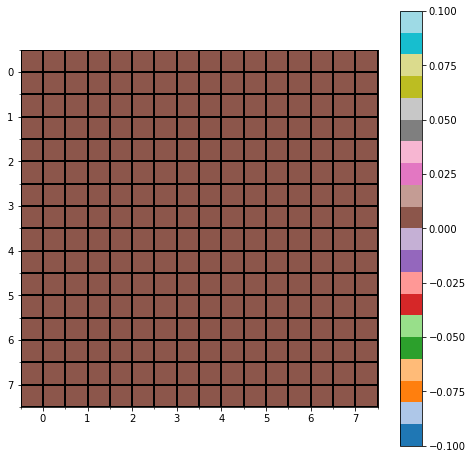

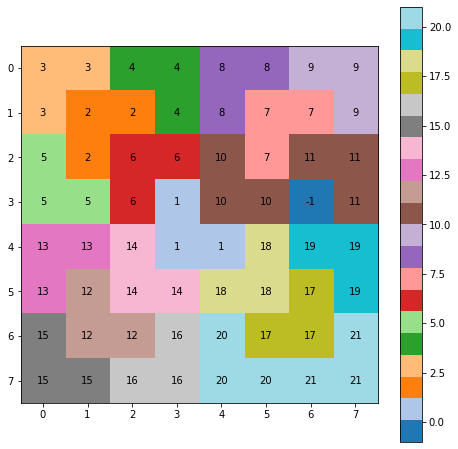

In [18]:
### Fonction de visualisation avant correlage
def afficher_echiquier_avant(echiquier):
    
    plt.figure(figsize=(8, 8))
    plt.imshow(echiquier, cmap="tab20", origin="upper")
    
    # Add gridlines for rows and columns
    plt.grid(which='both', color='black', linestyle='-', linewidth=2)
    plt.gca().set_xticks(np.arange(-0.5, len(echiquier), 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, len(echiquier), 1), minor=True)
    
    # Add text to the cells
    for i in range(len(echiquier)):
        for j in range(len(echiquier[i])):
            if echiquier[i][j] != 0:
                plt.text(j, i, str(echiquier[i][j]), ha='center', va='center', color='black')

    plt.colorbar()
    plt.show()
    
n = 8
echiquier = np.zeros((n, n), dtype=int)
afficher_echiquier_avant(echiquier)


### Fonction de visualisation apres correlage
def afficher_echiquier_apres(echiquier):
   
    plt.figure(figsize=(8, 8))
    plt.imshow(echiquier, cmap="tab20", origin="upper")
    for i in range(len(echiquier)):
        for j in range(len(echiquier[i])):
            if echiquier[i][j] != 0:
                plt.text(j, i, str(echiquier[i][j]), ha='center', va='center', color='black')
    plt.colorbar()
    plt.show()
    

### Exemple d'utilisation
if __name__ == "__main__":
    
    n = 8  
    x_def, y_def = 3,6
    
    # Initialisation de l'échiquier
    echiquier = np.zeros((n, n), dtype=int)

    echiquier[x_def][y_def] = -1  # case défectueuse = -1
    
    # Carrelage
    carrelage(n, x_def, y_def, 0, 0, echiquier)
    
    # Affichage
    afficher_echiquier_apres(echiquier)
